# Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

# Manipulation des données

Le dataset est nettoyé des appartements qui n'ont pas de reviews, les dates sont transformés en timestamp, les prix sont en $, les colonnes cleaning_fee et instant_bookable sont remplacés par des 1 et des 0 de même que les choix contenu dans les colonnes city et cancellation_policy.

In [9]:
df = pd.read_csv('data/data.csv')

df = df[['log_price', 'room_type', 'accommodates', 'cancellation_policy', 'cleaning_fee', 'city', 'first_review', 'instant_bookable', 'number_of_reviews', 'review_scores_rating', 'bedrooms']]
df['cleaning_fee'] = df['cleaning_fee'].astype(int)
df['instant_bookable'] = df['instant_bookable'].apply(lambda x: 1 if x == 'f' else 0)
df = df.dropna(axis=0, subset=['first_review'])
df['price_by_night'] = np.exp(df['log_price'])
df = df.drop(labels='log_price', axis=1)
df['price_by_person'] = df['price_by_night'] / df['accommodates']

unique_cities = df['city'].unique()
print(unique_cities) # ['NYC' 'DC' 'SF' 'LA' 'Chicago' 'Boston']
city = df['city']
df = pd.get_dummies(df, columns=['city'], dtype=int)
df['city'] = city

unique_policies = df['cancellation_policy'].unique()
print(unique_policies) # ['strict' 'moderate' 'flexible' 'super_strict_30' 'super_strict_60']

unique_room_type = df['room_type'].unique()
print(unique_room_type) # ['Entire home/apt' 'Private room' 'Shared room']

print(df['cleaning_fee'].value_counts())

df['first_review'] = pd.to_datetime(df['first_review'])
df['first_review_timestamp'] = df['first_review'].apply(lambda x: x.timestamp())

df_ny = df[(df['city_NYC'] == 1)]
print(df_ny['price_by_night'])

missing_review = df['review_scores_rating'].isna().sum()
print(f"{missing_review=}")
df = df.dropna(subset=['review_scores_rating'])

print(df.columns)
df.head()

['NYC' 'DC' 'SF' 'LA' 'Chicago' 'Boston']
['strict' 'moderate' 'flexible' 'super_strict_30' 'super_strict_60']
['Entire home/apt' 'Private room' 'Shared room']
1    46063
0    12184
Name: cleaning_fee, dtype: int64
0        150.0
1        169.0
2        145.0
10       100.0
18       132.0
         ...  
74094     40.0
74096     50.0
74097    110.0
74100    100.0
74108    185.0
Name: price_by_night, Length: 25491, dtype: float64
missing_review=859
Index(['room_type', 'accommodates', 'cancellation_policy', 'cleaning_fee',
       'first_review', 'instant_bookable', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'price_by_night', 'price_by_person',
       'city_Boston', 'city_Chicago', 'city_DC', 'city_LA', 'city_NYC',
       'city_SF', 'city', 'first_review_timestamp'],
      dtype='object')


,room_type,accommodates,cancellation_policy,cleaning_fee,first_review,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,price_by_night,price_by_person,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,city,first_review_timestamp
0,Entire home/apt,3,strict,1,2016-06-18,1,2,100.0,1.0,150.0,50.000000,0,0,0,0,1,0,NYC,1.466208e+09
1,Entire home/apt,7,strict,1,2017-08-05,0,6,93.0,3.0,169.0,24.142857,0,0,0,0,1,0,NYC,1.501891e+09
2,Entire home/apt,5,moderate,1,2017-04-30,0,10,92.0,1.0,145.0,29.000000,0,0,0,0,1,0,NYC,1.493510e+09
4,Entire home/apt,2,moderate,1,2015-05-12,0,4,40.0,0.0,115.0,57.500000,0,0,1,0,0,0,DC,1.431389e+09
5,Private room,2,strict,1,2017-08-27,0,3,100.0,1.0,85.0,42.500000,0,0,0,0,0,1,SF,1.503792e+09


# Numpy, Pandas & Matplop

## Catégorie de prix pour chaque ville

Pour chaque ville, on récupère le prix et nombre de personnes acceptées pour chaque appartement, on divise le prix / nombre de personne, puis on calcule la moyenne de prix par personne.

Avec la moyenne par ville calculée, on calcule le prix par personne pour récupèrer la moyenne en fonction de la ville de l'appartement

C:\Users\SCHULER\AppData\Local\Temp\ipykernel_8048\3498813006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['price_per_person'] = df_city['price_by_night'] / df_city['accommodates']
C:\Users\SCHULER\AppData\Local\Temp\ipykernel_8048\3498813006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['price_per_person'] = df_city['price_by_night'] / df_city['accommodates']
C:\Users\SCHULER\AppData\Local\Temp\ipykernel_8048\3498813006.py:6: SettingWithCopyWarning: 
A value is trying to be set

{'NYC': 51.70403997177353, 'DC': 46.80620138905808, 'SF': 69.1229376044118, 'LA': 44.02569614325781, 'Chicago': 35.7390091062823, 'Boston': 53.51335476137336}


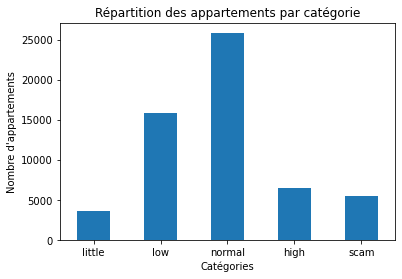

In [13]:
CITIES = unique_cities
averages = {}

for city in CITIES:
  df_city = df[df['city'] == city]
  df_city['price_per_person'] = df_city['price_by_night'] / df_city['accommodates']
  average = df_city['price_per_person'].mean()
  averages[city] = average

print(averages)

def categorize_price(row):
  price = row['price_by_night'] / row['accommodates']
  average = averages[row['city']]

  if price < average * 0.4:
    return 'little'
  elif price < average * 0.7:
    return 'low'
  elif price < average * 1.3:
    return 'normal'
  elif price < average * 1.7:
    return 'high'
  else:
    return 'scam'

df['category'] = df.apply(categorize_price, axis=1)
rating_category_average = df.groupby('category')['review_scores_rating'].mean()
category_order = ['little', 'low', 'normal', 'high', 'scam']
category_counts = df['category'].value_counts().reindex(category_order)

plt.figure()
ax = category_counts.plot(kind='bar')
plt.title('Répartition des appartements par catégorie')
plt.xlabel('Catégories')
plt.ylabel("Nombre d'appartements")
plt.xticks(rotation=0)


plt.show()

## Manipulation de l'année de premier commentaire

La répartition appartements par année avec chaque année le prix moyen par nuit par personne

Date minimale :  2008-11-17 00:00:00
Date maximale :  2017-10-05 00:00:00
Moyenne de la date :  2016-01-11 17:54:40.825259686
year
2008    36.000000
2009    48.968380
2010    52.603781
2011    54.622992
2012    56.151820
2013    56.295113
2014    53.323807
2015    51.576790
2016    47.490819
2017    48.139435
Name: price_by_person, dtype: float64


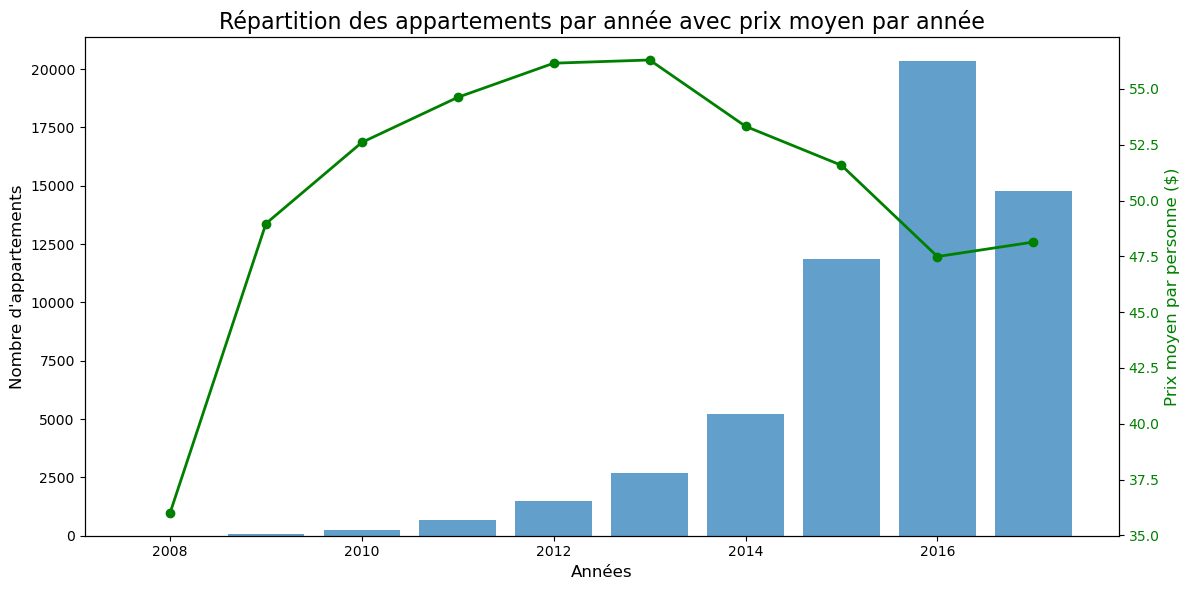

In [58]:
min_timestamp = df['first_review_timestamp'].min()
min_date = pd.to_datetime(min_timestamp, unit='s')

max_timestamp = df['first_review_timestamp'].max()
max_date = pd.to_datetime(max_timestamp, unit='s')

average_timestamp = df['first_review_timestamp'].mean()
average_date = pd.to_datetime(average_timestamp, unit='s')

print("Date minimale : ", min_date)
print("Date maximale : ", max_date)
print("Moyenne de la date : ", average_date)

df['year'] = df['first_review'].dt.year
year_counts = df['year'].value_counts().sort_index()
year_price_average = df.groupby('year')['price_by_person'].mean().sort_index()
print(year_price_average)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot
bars = ax1.bar(year_counts.index, year_counts.values, width=0.8, alpha=0.7)
ax1.set_xlabel('Années', fontsize=12)
ax1.set_ylabel("Nombre d'appartements", fontsize=12)
ax1.set_title('Répartition des appartements par année avec prix moyen par année', fontsize=16)
ax1.tick_params(axis='y')
plt.xticks(rotation=0)

# Line plot
ax2 = ax1.twinx()
line = ax2.plot(year_price_average.index, year_price_average.values, color='green', marker='o', linestyle='-', linewidth=2, markersize=6)
ax2.set_ylabel('Prix moyen par personne ($)', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adjust layout and display
plt.tight_layout()
plt.show()

## Manipulation des colonnes frais de ménage et réservation immédiate

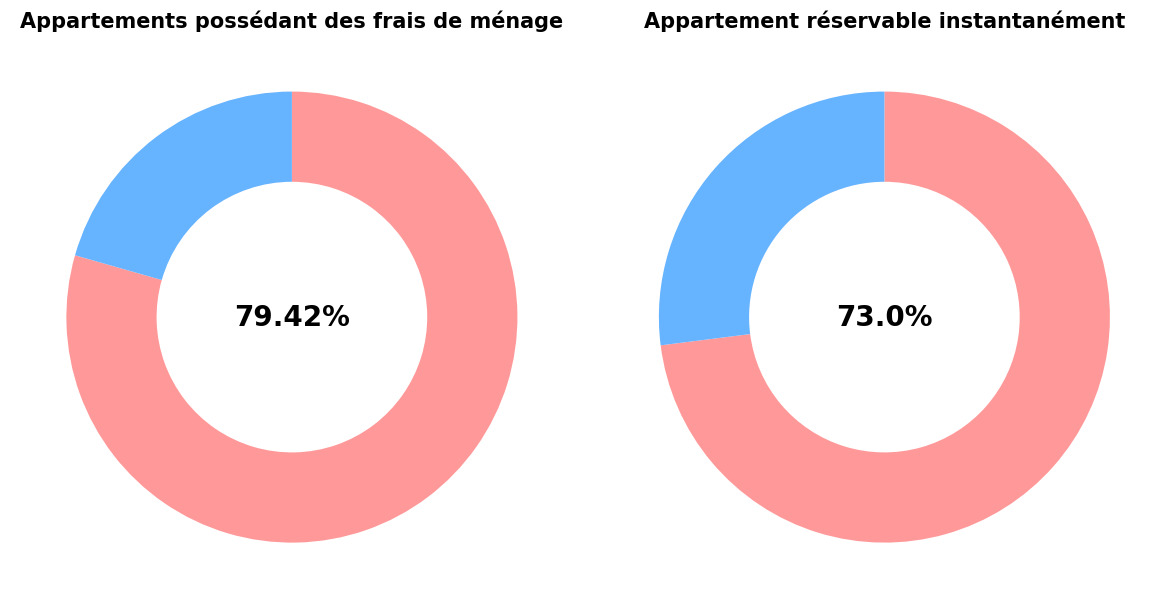

In [59]:
cleaning_fee_proportion = np.round(df['cleaning_fee'].mean() * 100, 2)
instant_bookable_proportion = np.round(df['instant_bookable'].mean() * 100)

cleaning = [cleaning_fee_proportion, 100 - cleaning_fee_proportion]
bookable = [instant_bookable_proportion, 100 - instant_bookable_proportion]

colors = ['#ff9999', '#66b3ff']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(cleaning, colors=colors, startangle=90, counterclock=False, wedgeprops=dict(width=0.4))
ax1.set_title("Appartements possédant des frais de ménage", fontsize=15, fontweight='bold')
ax1.text(0, 0, f"{cleaning_fee_proportion}%", ha='center', va='center', fontsize=20, fontweight='bold')

ax2.pie(bookable, colors=colors, startangle=90, counterclock=False, wedgeprops=dict(width=0.4))
ax2.set_title("Appartement réservable instantanément", fontsize=15, fontweight='bold')
ax2.text(0, 0, f"{instant_bookable_proportion}%", ha='center', va='center', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

## Nombres de personnes acceptées

Moyenne de personnes par appartement :  3.218268627587649
Médiane de personnes par appartement :  2.0
Variance de personnes par appartement :  4.597451812621364
Écart-type de personnes par appartement :  2.1441669274152524


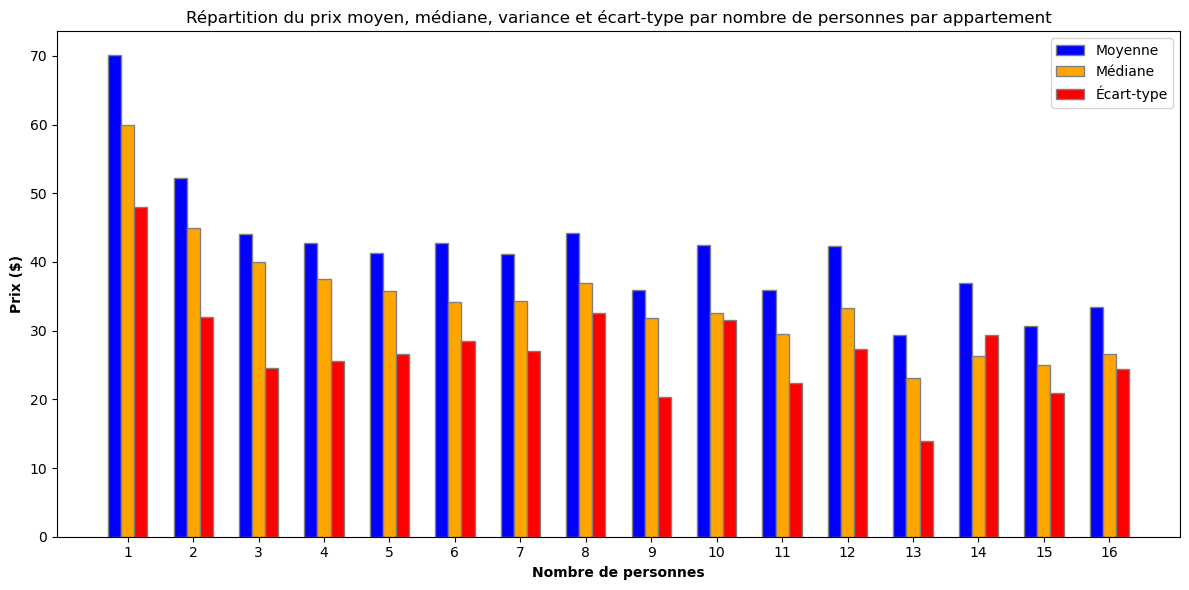

In [60]:
accommodates_average = df['accommodates'].mean()
accommodates_median = df['accommodates'].median()
accommodates_variance = df['accommodates'].var()
accommodates_deviation = df['accommodates'].std()

print("Moyenne de personnes par appartement : ", accommodates_average)
print("Médiane de personnes par appartement : ", accommodates_median)
print("Variance de personnes par appartement : ", accommodates_variance)
print("Écart-type de personnes par appartement : ", accommodates_deviation)

accommodates_price = df.groupby('accommodates')['price_by_person']
accommodates_price_average = accommodates_price.mean()
accommodates_price_median = accommodates_price.median()
accommodates_price_deviation = accommodates_price.std()

accommodates_df = pd.DataFrame({
    'average': accommodates_price_average,
    'median': accommodates_price_median,
    'deviation': accommodates_price_deviation
})

bar_width = 0.2

r1 = np.arange(len(accommodates_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(12, 6))

plt.bar(r1, accommodates_df['average'], color='blue', width=bar_width, edgecolor='grey', label='Moyenne')
plt.bar(r2, accommodates_df['median'], color='orange', width=bar_width, edgecolor='grey', label='Médiane')
plt.bar(r3, accommodates_df['deviation'], color='red', width=bar_width, edgecolor='grey', label='Écart-type')

plt.xlabel('Nombre de personnes', fontweight='bold')
plt.ylabel('Prix ($)', fontweight='bold')
plt.title('Répartition du prix moyen, médiane, variance et écart-type par nombre de personnes par appartement')
plt.xticks([r + bar_width for r in range(len(accommodates_df))], accommodates_df.index, rotation=0)

plt.legend()
plt.tight_layout()
plt.show()

## Heatmap de corrélation entre le prix et le nombre de personnes

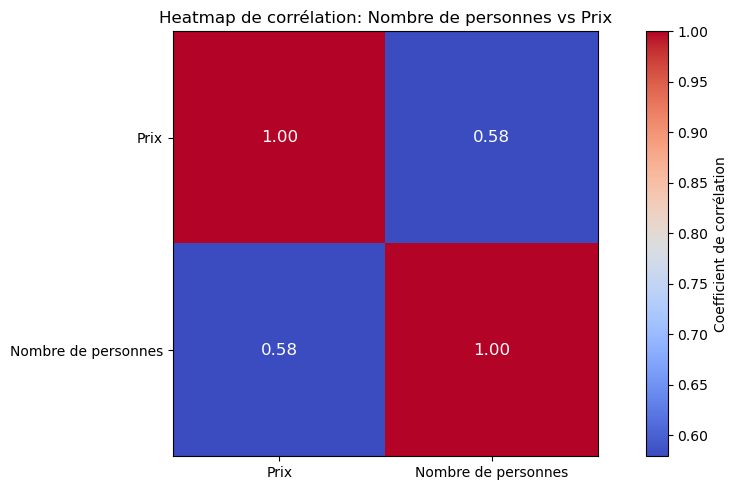

In [61]:
correlation = df[['price_by_night', 'accommodates']].corr()

plt.figure(figsize=(10, 5))
plt.imshow(correlation, cmap='coolwarm')
plt.colorbar(label='Coefficient de corrélation')

labels = ['Prix', 'Nombre de personnes']
plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)

# Afficher les valeurs dans les cellules
for i in range(len(correlation)):
    for j in range(len(correlation.columns)):
        plt.text(j, i, f'{correlation.iloc[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)


plt.title('Heatmap de corrélation: Nombre de personnes vs Prix')
plt.tight_layout()
plt.show()

# Machine Learning

## Régression linéaire sur le prix par personne en fonction du nombre de personnes

Coefficients :  [-2.65670704]
Intercept :  58.322064582533095
MSE:  1014.4107493225108
RMSE:  31.849815530431425
R² :  0.035504250860247


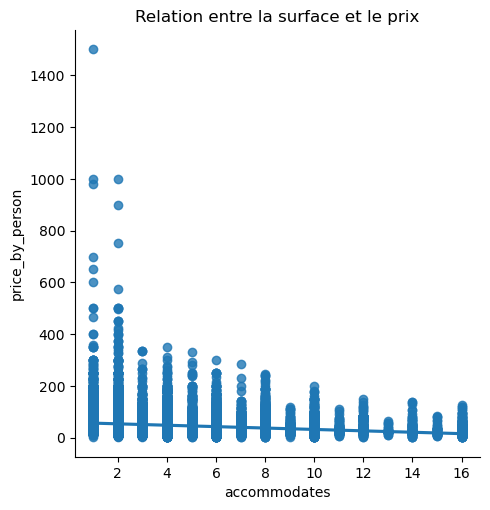

In [53]:
X = df[['accommodates']]
y = df['price_by_person']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficients : ", model.coef_)
print("Intercept : ", model.intercept_)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² : ", r2_score(y_test, y_pred))

sns.lmplot(x='accommodates', y='price_by_person', data=df)
plt.title("Relation entre la surface et le prix")
plt.show()

## Régression linéaire sur le prix en fonction du nombre de personnes, de la ville, des frais de ménage et de la réservation instantané

Coefficients :  [3.71895827e+01 6.14967299e+00 2.06714958e+01 1.26384536e+12
 1.26384536e+12 1.26384536e+12 1.26384536e+12 1.26384536e+12
 1.26384536e+12]
Intercept :  -1263845361538.1726
MSE:  10525.90938362244
RMSE:  102.59585461227194
R² :  0.366277571316044


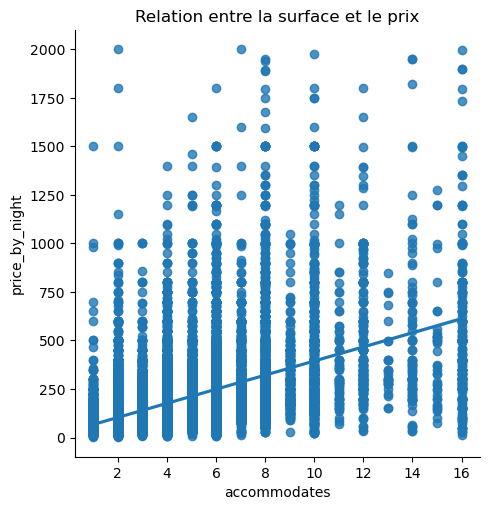

In [54]:
X = df[['accommodates', 'cleaning_fee', 'instant_bookable', 'city_NYC', 'city_DC', 'city_SF', 'city_LA', 'city_Chicago', 'city_Boston']]
y = df['price_by_night']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficients : ", model.coef_)
print("Intercept : ", model.intercept_)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² : ", r2_score(y_test, y_pred))

sns.lmplot(x='accommodates', y='price_by_night', data=df)
plt.title("Relation entre la surface et le prix")
plt.show()

## Classification logistique s'il y a des frais de ménage en fonction du prix et de la ville

In [34]:
X = edited_df[['price_by_night', 'city_NYC', 'city_DC', 'city_SF', 'city_LA', 'city_Chicago', 'city_Boston']]
y = edited_df['cleaning_fee']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

log_accuracy = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {log_accuracy * 100:.2f}%")
print("Recall (rappel) :", log_recall)
print("F1-Score :", log_f1)

print("Coefficients du modèle : ", log_model.coef_)
print("Intercept du modèle : ", log_model.intercept_)
print(classification_report(y_test, y_pred))

Accuracy : 79.61%
Recall (rappel) : 1.0
F1-Score : 0.8864613991396876
Coefficients du modèle :  [[ 0.00712566 -0.07042405 -0.08289434 -0.00764811  0.44851488  0.05913572
   0.06288475]]
Intercept du modèle :  [0.412009]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2006
           1       0.80      1.00      0.89      7831

    accuracy                           0.80      9837
   macro avg       0.40      0.50      0.44      9837
weighted avg       0.63      0.80      0.71      9837



/opt/anaconda3/envs/esgi/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/esgi/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/esgi/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Classification KNN s'il y a des frais de ménage en fonction du prix et de la ville

In [35]:
X = edited_df[['price_by_night', 'city_NYC', 'city_DC', 'city_SF', 'city_LA', 'city_Chicago', 'city_Boston']]
y = edited_df['cleaning_fee']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {knn_accuracy * 100:.2f}%")
print("Recall (rappel) :", knn_recall)
print("F1-Score :", knn_f1)

print(classification_report(y_test, y_pred))

Accuracy : 74.92%
Recall (rappel) : 0.900523560209424
F1-Score : 0.8511254601412106
              precision    recall  f1-score   support

           0       0.29      0.16      0.20      2006
           1       0.81      0.90      0.85      7831

    accuracy                           0.75      9837
   macro avg       0.55      0.53      0.53      9837
weighted avg       0.70      0.75      0.72      9837

